### UNIVERSITE VIRTUELLE DU SENEGAL

### MASTER BIG DATA ANALITYCS

# Projet Machine Learning 

# Chargement et exploitation des données

In [84]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline

In [16]:
#chargement des données
Boston_Data = pd.read_csv('Boston_Data.csv',header=0)

Après chargement de la base de donnée, on la visualise pour mieux le comprendre

In [17]:
Boston_Data.head(3)

,Unnamed: 0,R1,R2,R3,R4,R5,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,0,-0.21,0.11,-0.65,-0.54,1.48,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.08,-0.61,-0.85,-0.36,-0.12,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,-1.32,0.95,-0.75,-0.99,-0.36,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


Avant de commencer le traitement nous vérifions s'il y'a pas de valeurs null

In [18]:
Boston_Data.isnull().sum()
#Rendu : Pas de valeurs nulles

Unnamed: 0    0
R1            0
R2            0
R3            0
R4            0
R5            0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
Y             0
dtype: int64

##### On divise notre jeu de données en 2 parties (75% pour l’apprentissage et les 25% restant pour le test)

Nous allons d'abord scinder les données en deux parties : un vecteur contenant les valeurs de la variable cible (variable endogène) Y, une matrice avec les variables explicatives (variables exogènes) X.

In [19]:
X = Boston_Data.drop(['Unnamed: 0','Y'],axis=1)  # variables explicatives (exogènes) X
Y = Boston_Data['Y']  # variable cible (endogène) Y

#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, 
                                                    random_state=42)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)

X_train (379, 18)
X_test (127, 18)
Y_train (379,)
Y_test (127,)


##### Normalisation des X_train et X_test 

In [20]:
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

********************

# I.  Régression linéaire multiple

En statistique, la régression linéaire multiple est une méthode de régression mathématique étendant la régression linéaire simple pour décrire les variations d'une variable endogène associée aux variations de plusieurs variables exogènes.

### Entrainement du modèle

In [21]:
#entrainement du modèle
model = LinearRegression()
model.fit(X_train_n, Y_train)

LinearRegression()

### Évaluation du modèle de régression linéaire

On utilise deux métriques pour l’évaluation de l’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [85]:
# Evaluation de l'ensemble d'entraînement
y_train_predict = model.predict(X_train_n)
# erreur quadratique moyenne
err_rlm_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
# score R2
score_rlm_train = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(err_rlm_train))
print('le score R2 est {}'.format(score_rlm_train))
print('\n')
 
# Evaluation de l'ensemble de test
y_test_predict = model.predict(X_test_n)
err_rlm_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
score_rlm_test = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(err_rlm_test))
print('le score R2 est {}'.format(score_rlm_test))

La performance du modèle sur la base dapprentissage
--------------------------------------
L'erreur quadratique moyenne est 5.366017142585634
le score R2 est 0.6753092268857508


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5.112991189326277
le score R2 est 0.6266779203334305


L'erreur quadratique moyenne mesure la moyenne des carrés des erreurs, c'est a dire la diférence quadretique myenne entre les valeurs estimées.

Le R au carré est une mesure de la qualité de l'ajustement pour les modèles de régression linéaire

#### Avantages et limites de la regression multiple

##### - Avantages

La régression linéaire est simple à mettre en œuvre et donne des résultats satisfaisants. Les modèles de régression peuvent être formés facilement et efficacement. Ils ont aussi une complexité temporelle considérablement faible par rapport à d’autres modèles d’apprentissage automatique. Cet algorithme performe sur des ensembles de données séparables linéairement et il est ainsi souvent appliqué pour déterminer la nature de la relation entre les variables.

##### - Limites

Lors de l’application des modèles de régression, les valeurs aberrantes peuvent avoir des effets énormes sur la régression. Il est possible dans certains cas qu’on retrouve des situations de sous-ajustement (underfitting), et cela lorsque le modèle d’apprentissage automatique ne parvient pas à saisir les données correctement ce qui est généralement le résultat d’une fonction d’hypothèse mal adaptée aux données. La régression linéaire suppose alors que les données d’entrée sont indépendantes l’une de l’autre.

**********

# II.  Méthode de sélection de variable pas-à-pas descendante

C'est une procédure d'élimination descendante

Méthode permettant de déterminer les variables à conserver dans un modèle. L'élimination descendante part d'un modèle contenant tous les termes, puis supprime des termes un par un, avec la même méthode que pour la procédure pas à pas.

In [23]:
Boston_Data.drop(['Unnamed: 0','Y'],axis=1).columns

Index(['R1', 'R2', 'R3', 'R4', 'R5', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
       'X8', 'X9', 'X10', 'X11', 'X12', 'X13'],
      dtype='object')

On convertit *X_train_n* en dataframe en éliminant en meme temps la première et dernière colonne pour garder seulement les variables explicatives

In [24]:
Xppd_train_n = pd.DataFrame(X_train_n, 
                            columns = Boston_Data.drop(['Unnamed: 0','Y'],
                                                       axis=1).columns)

In [25]:
type(Xppd_train_n)

pandas.core.frame.DataFrame

#### Ajout de la colonne " const " constituer de 1 a la matrice *Xppd_train_n* (ensemble d'apprentissage)

Il faut ajouter la constante (valeur 1) à la matrice Xppd_train_n pour que l’opération soit cohérente

In [26]:
Xppd_train_n=sm.tools.tools.add_constant(Xppd_train_n , 
                                         prepend=True , 
                                         has_constant='skip')

In [27]:
Xppd_train_n.head(3)

,const,R1,R2,R3,R4,R5,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1.0,-1.692906,0.245167,-0.393282,1.390237,1.175517,-0.406795,-0.502812,-1.247076,-0.287849,-0.591174,1.156255,0.833235,-0.503753,-0.740571,-1.280208,-0.205157,0.404512,-1.077756
1,1.0,1.132752,0.867318,0.046312,-0.403390,0.173093,0.007992,-0.502812,1.218283,3.474042,2.628380,-0.238475,0.486246,-0.956440,-0.507741,-0.013937,-1.576252,-3.098037,0.351165
2,1.0,0.478280,1.375407,0.035846,0.100764,-0.630738,-0.413450,0.364381,-1.121792,-0.287849,-0.970291,2.080976,-0.167973,0.441388,-0.507741,-1.141522,-1.487795,0.326591,-1.226252


#### instanciation et détails

On applique une procédure par élimination successive des variables en supprimant celle qui a la plus grande valeure de p-values (supérieure à 0.05).

Dans notre cas on a supprimé successivement 'R3' , 'X7' , 'X3' , 'R1' , 'R2' , 'R5' , 'R4' , 'X2' puis 'X10'

In [28]:
reg = sm.OLS(np.array(Y_train), 
             Xppd_train_n.drop(['R3','X7','X3','R1','R2','R5','R4','X2','X10'],
                               axis=1)).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     118.6
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          3.51e-103
Time:                        16:26:35   Log-Likelihood:                -1130.2
No. Observations:                 379   AIC:                             2280.
Df Residuals:                     369   BIC:                             2320.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9079      0.248     92.188      0.0

#### Évaluation du modèle

In [29]:
# Extraction des variables retenues en supprimant celles qui ne nous intéressent pas.
Xppd_train_n = Xppd_train_n.drop(['R3','R2','R5','X7','X3','R4','R1','X10','X2'],
                                 axis=1)

In [30]:
Xppd_train_n.head(3)

,const,X1,X4,X5,X6,X8,X9,X11,X12,X13
0,1.0,-0.406795,-0.287849,-0.591174,1.156255,-0.503753,-0.740571,-0.205157,0.404512,-1.077756
1,1.0,0.007992,3.474042,2.628380,-0.238475,-0.956440,-0.507741,-1.576252,-3.098037,0.351165
2,1.0,-0.413450,-0.287849,-0.970291,2.080976,0.441388,-0.507741,-1.487795,0.326591,-1.226252


On convertit *X_test_n* en dataframe en éliminant en meme temps la première et dernière colonne pour garder seulement les variables explicatives

In [35]:
Xppd_test_n = pd.DataFrame(X_test_n, 
                           columns = Boston_Data.drop(['Unnamed: 0','Y'],
                                                      axis=1).columns)

In [36]:
type(Xppd_test_n)

pandas.core.frame.DataFrame

In [37]:
# Extraction des variables retenues en supprimant celles qui ne nous intéressent pas.
Xppd_test_n = Xppd_test_n.drop(['R3','R2','R5','X7','X3','R4','R1','X10','X2'],
                               axis=1)

#### Ajout de la colonne " const " constituer de 1 a la matrice *Xppd_test_n* (ensemble de test)

In [38]:
Xppd_test_n=sm.tools.tools.add_constant(Xppd_test_n , prepend=True , 
                                        has_constant='skip')

In [39]:
Xppd_test_n.head(3)

,const,X1,X4,X5,X6,X8,X9,X11,X12,X13
0,1.0,-0.406705,-0.287849,-0.406239,0.128632,-0.529489,-0.507741,-0.735903,0.420302,-0.486575
1,1.0,-0.410961,3.474042,-0.935826,0.604203,0.148902,-0.624156,-0.293614,0.436321,-1.258473
2,1.0,-0.405024,-0.287849,0.425970,-0.473480,-0.898332,-0.624156,0.812108,0.358629,0.778440


On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [86]:
# Evaluation de l'ensemble d'entraînement
y_train_predict = reg.predict(Xppd_train_n)
err_ppd_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
score_ppd_train = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(err_ppd_train))
print('le score R2 est {}'.format(score_ppd_train))
print('\n')

# Evaluation de l'ensemble de test
y_test_predict = reg.predict(Xppd_test_n)
err_ppd_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
score_ppd_test = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(err_ppd_test))
print('le score R2 est {}'.format(score_ppd_test))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 4.773336192339393
le score R2 est 0.7430729191945766


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 4.877032909593132
le score R2 est 0.6603395660591358


L'erreur quadratique moyenne mesure la moyenne des carrés des erreurs, c'est a dire la diférence quadretique myenne entre les valeurs estimées.

Le R au carré est une mesure de la qualité de l'ajustement pour les modèles de régression linéaire

#### Avantages et limites de la Méthode de sélection de variable pas-à-pas descendante

#### Avantages

C'est une méthode permettant de déterminer les variables à conserver dans un modèle. L'élimination descendante part d'un modèle contenant tous les termes, puis supprime des termes un par un, avec la même méthode que pour la procédure pas à pas. 

#### Limites

Aucune variable exclue ne peut être réintégrée au modèle

*******************

# III.  régression Ridge 

1. La régression de ridge permet d'estimer un modèle en présence de covariable fortement corrélés

2. La régression de ridge est une méthode de réglage du modèle utilisée pour analyser toutes les données qui souffrent de multicolinéarité. Lorsque le problème de la multicolinéarité se produit, les moindres carrés sont sans biais et les variances sont importantes, ce qui fait que les valeurs prédites sont éloignées des valeurs réelles

#### Recherche de la meilleure valeur alpha

On doit trouver un coefficient de régularisation adapté. L'objectif est de biaiser un peu la prédiction, afin de diminuer l'erreur standard.

On appelle ce coefficient alpha, on va en tester un certain nombre afin de trouver celui qui est optimal.

In [42]:
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

# a est un hyperparamètre que nous sommes en train de régler, listant les options
a = np.arange(0.01,30,0.1)

cross_validating_ridge = RidgeCV(alphas=a, store_cv_values=True)
cross_validating_ridge.fit(X_train_n, Y_train)

# recherche d'erreurs quadratiques moyennes
cv_rmse = np.sqrt(np.mean(cross_validating_ridge.cv_values_, axis=0))


print("La meilleure valeure de alpha est : ", cross_validating_ridge.alpha_)

La meilleure valeure de alpha est :  9.31


In [43]:
# Créer une régression de Ridge avec une valeur alpha
regr = Ridge(alpha=9.31, fit_intercept=True)
# Ajuster la régression
model = regr.fit(X_train_n, Y_train)

On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [87]:
# Evaluation de l'ensemble d'entraînement
y_train_predict = model.predict(X_train_n)
err_rr_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
score_rr_train = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(err_rr_train))
print('le score R2 est {}'.format(score_rr_train))
print('\n')

# Evaluation de l'ensemble de test
y_test_predict = model.predict(X_test_n)
err_rr_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
score_rr_test = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(err_rr_test))
print('le score R2 est {}'.format(score_rr_test))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 5.366017142585634
le score R2 est 0.6753092268857508


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5.112991189326277
le score R2 est 0.6266779203334305


L'erreur quadratique moyenne mesure la moyenne des carrés des erreurs, c'est a dire la diférence quadretique myenne entre les valeurs estimées.

Le R au carré est une mesure de la qualité de l'ajustement pour les modèles de régression linéaire

#### Avantages et limites de la régression Ridge 

#### - Avantages

Les effets de variables explicatrice très corrélées se combinent pour se renforcer mutuellement.

#### - Limites

Toutes les variables incluses initialement dans le modèle final, pas moyen de dire quelles variables sont les plus importantes.

**********************

# IV.  Régression LASSO

1. Dans les statistiques et l'apprentissage automatique, le lasso est une méthode d'analyse de régression qui effectue à la fois une sélection et une régularisation de variables afin d'améliorer la précision de prédiction et l'interprétabilité du modèle statistique résultant.
2. La regresion par Lasso est un type de régression linéaire qui utilise le retrécissement. Le retrécissement est l'endroit ou les valeurs des données sont réduits vers un piont central, comme la moyenne.

##### Recherche de la meilleure valeur alpha

On doit trouver un coefficient de régularisation adapté. L'objectif est de biaiser un peu la prédiction, afin de diminuer l'erreur standard.

On appelle ce coefficient alpha, on va en tester un certain nombre afin de trouver celui qui est optimal.

In [45]:
from sklearn.linear_model import LassoCV
#obtention des valeurs des coefs. corresp.
from sklearn.linear_model import lasso_path

my_alphas = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,
                      0.8,1.0,1.001,1.01,1.02,1.05,2])
#my_alphas = np.arange(0.01,30,0.1)

#outil pour la détection de la solution la plus performante en validation croisée
#random_state = 0 pour fixer l’initialisation du générateur de nombre aléatoire
#cv = 5 pour 5-fold validation croisée
lcv = LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,
              random_state=42,cv=5)

#lancement sur l'échantillon d'apprentissage
lcv.fit(X_train_n, Y_train)

LassoCV(alphas=array([1.000e-03, 1.000e-02, 2.000e-02, 2.500e-02, 5.000e-02, 1.000e-01,
       2.500e-01, 5.000e-01, 8.000e-01, 1.000e+00, 1.001e+00, 1.010e+00,
       1.020e+00, 1.050e+00, 2.000e+00]),
        cv=5, fit_intercept=False, random_state=42)

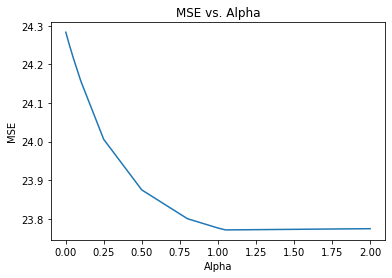

La meilleure valeure de alpha est : : 1.05


In [46]:
#moyenne mse en validation croisée pour chaque alpha
avg_rmse = np.sqrt(np.mean(lcv.mse_path_,axis=1))
#sous-forme graphique
plt.plot(lcv.alphas_,avg_rmse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()
print("La meilleure valeure de alpha est : :",lcv.alpha_)

In [47]:
# Créer une régression Lasso avec une valeur alpha
model = Lasso(alpha=1.05, fit_intercept=True)
# Ajuster la régression
model.fit(X_train_n, Y_train)

Lasso(alpha=1.05)

On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [88]:
# Evaluation de l'ensemble d'entraînement
y_train_predict = model.predict(X_train_n)
err_rl_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
score_rl_train = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(err_rl_train))
print('le score R2 est {}'.format(score_rl_train))
print('\n')

# Evaluation de l'ensemble d'entraînement
y_test_predict = model.predict(X_test_n)
err_rl_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
score_rl_test = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(err_rl_test))
print('le score R2 est {}'.format(score_rl_test))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 5.366017142585634
le score R2 est 0.6753092268857508


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5.112991189326277
le score R2 est 0.6266779203334305


L'erreur quadratique moyenne mesure la moyenne des carrés des erreurs, c'est a dire la diférence quadretique myenne entre les valeurs estimées.

Le R au carré est une mesure de la qualité de l'ajustement pour les modèles de régression linéaire

In [41]:
model.coef_

array([ 0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.29544932,  0.        , -0.        ,  0.44036194, -0.        ,
        3.24785174, -0.        , -0.25862304, -0.        , -0.        ,
       -1.47806623,  0.76246127, -3.67407282])

LASSO fait office de dispositif de sélection de variables en annulant certains coefficients βj : les variables associées à (βj = 0) sont de facto exclues du modèle prédictif.

#### Avantages et limites de la régression Lasso 

#### - Avantages

Les effets peu important sont estimés à 0, donc le modèle  sélectionné aura un nombre de variables d<p.

#### - Limites

En présence de variables explicatrice corrélées, le Lasso en choisit une arbitrairement et met les autres à 0.

*********************************

## V.  Comparaison des différents modèle de régression étudiés dans ce document

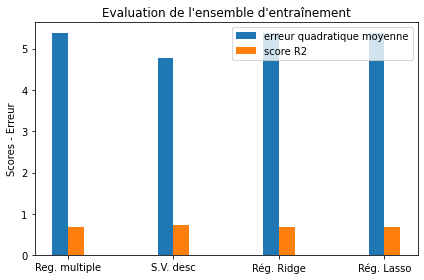

In [90]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Reg. multiple', 'S.V. desc', 'Rég. Ridge', 'Rég. Lasso']
men_means = [err_rlm_train, err_ppd_train, err_rr_train, err_rl_train]
women_means = [score_rlm_train, score_ppd_train, score_rr_train, score_rl_train]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='erreur quadratique moyenne')
rects2 = ax.bar(x + width/2, women_means, width, label='score R2')

# Le titre et les étiquettes de graduation personnalisées
ax.set_ylabel('Scores - Erreur')
ax.set_title("Evaluation de l'ensemble d'entraînement")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

1. On remarque que la méthode de *sélection de variable pas-à-pas descendante* à une plus grande valeur du score R² et moins de valeur pour l'erreur quadrique moyenne sur l'ensemble d'entainement.

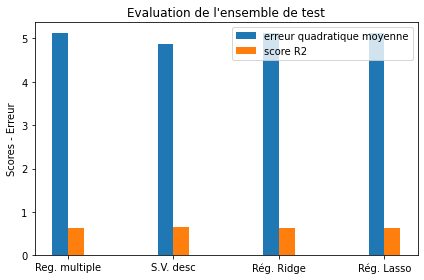

In [92]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Reg. multiple', 'S.V. desc', 'Rég. Ridge', 'Rég. Lasso']
men_means = [err_rlm_test, err_ppd_test, err_rr_test, err_rl_test]
women_means = [score_rlm_test, score_ppd_test, score_rr_test, score_rl_test]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='erreur quadratique moyenne')
rects2 = ax.bar(x + width/2, women_means, width, label='score R2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores - Erreur')
ax.set_title("Evaluation de l'ensemble de test")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

2. On remarque que la méthode de *sélection de variable pas-à-pas descendante* à une plus grande valeur du score R² et moins de valeur pour l'erreur quadrique moyenne sur l'ensemble de test.

##### D'apprès 1. et 2. *la méthode de sélection de variable pas-à-pas descendante* est le meilleur modèle pour ce dataset.

Ce pendant il faut noter que chaque modèle a ses avantages et limites et plus performant selon les contextes.